In [11]:
import numpy as np

In [87]:
A = np.array([[2, 1, 1],
            [4, -6, 0],
            [-2, 7, 2]], dtype=np.float)
A

array([[ 2.,  1.,  1.],
       [ 4., -6.,  0.],
       [-2.,  7.,  2.]])

#### Gaussian Elimation without Pivoting

In [75]:
def slu(A):
    m, n = A.shape

    for k in range(m-1):
        A[k+1:, k] = A[k+1:, k]/A[k, k]
        A[k+1:, k+1:] = A[k+1:, k+1:] - np.outer(A[k+1:, k],A[k, k+1:])

    L = np.identity(m) + np.tril(A, -1)
    U = np.triu(A)
    return L, U

L, U = slu(A.copy())
print(A)
print(L)
print(U)

[[ 2.  1.  1.]
 [ 4. -6.  0.]
 [-2.  7.  2.]]
[[ 1.  0.  0.]
 [ 2.  1.  0.]
 [-1. -1.  1.]]
[[ 2.  1.  1.]
 [ 0. -8. -2.]
 [ 0.  0.  1.]]


## 1)  Algorithm 1.2. 
- Implement Gaussian Elimination with Pivoting  
- Test it with built-in Python code `scipy.linalg.lu`

In [40]:
from scipy.linalg import lu

A = np.array([[1, 1, 2],
         [4, -3, 1],
        [-1, 6,6]], dtype=np.float)

def plu(A):
    m, n = A.shape
    P = np.identity(m)

    for k in range(m-1):
        maxv = np.max(abs(A[k:, k]))
        r = np.argmax(abs(A[k:, k]))

        q = r + k
        P[[k,q],:] = P[[q,k],:]
        A[[k,q],:] = A[[q,k],:]

        if A[k,k] != 0:
            A[k+1:, k] = A[k+1:, k]/A[k, k]
            A[k+1:, k+1:] = A[k+1:, k+1:] - np.outer(A[k+1:, k],A[k, k+1:])

    L = np.identity(m) + np.tril(A, -1)
    U = np.triu(A)
    return P, L, U


P,L,U = plu(A.copy())
print("======== Algorithm 1.2 ========")
print(P)
print(L)
print(U)
print()

print("===== Built-in Function lu =====")
P, L, U = lu(A.copy())
print(A)
print(P)
print(L)
print(U)

======== Algorithm 1.2 ========
[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
[[ 1.          0.          0.        ]
 [-0.25        1.          0.        ]
 [ 0.25        0.33333333  1.        ]]
[[ 4.         -3.          1.        ]
 [ 0.          5.25        6.25      ]
 [ 0.          0.         -0.33333333]]

===== Built-in Function lu =====
[[ 1.  1.  2.]
 [ 4. -3.  1.]
 [-1.  6.  6.]]
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]
[[ 1.          0.          0.        ]
 [-0.25        1.          0.        ]
 [ 0.25        0.33333333  1.        ]]
[[ 4.         -3.          1.        ]
 [ 0.          5.25        6.25      ]
 [ 0.          0.         -0.33333333]]


## 2) Algorithm 1.3

In [88]:
b = np.array([5, -12, 2], dtype=np.float)
b

array([  5., -12.,   2.])

In [79]:
def plusol(A, b):
    P, L, U = lu(A)
    m, n = A.shape
    y = np.zeros((m,1))
    c = np.dot(P, b)
    
    for j in range(m):
        y[j] = (c[j] - np.dot(L[j, :j+1],y[:j+1]))
    
    x = np.zeros((n,1))
    for j in range(n-1, -1, -1):
        x[j] = (y[j] - np.dot(U[j, j:], x[j:]))/U[j,j]
    
    return x.reshape(-1)
    
x = plusol(A.copy(), b.copy())    
x

array([  6.75,   6.5 , -15.  ])

## 3) Algorithm 1.4

In [80]:
from numpy.linalg import det

def determ(A):
    P, L, U = lu(A)
    d = det(P) * np.prod(np.diag(U))
    return d

determ(A.copy())

-16.0

## 4) Algorithm 1.6

In [81]:
from numpy.linalg import det

def cramer(A, b):
    m, n = np.shape(A)
    for j in range(n):
        B = A.copy()
        B[:,j] = b
        x[j] = det(B)/det(A)
    return x

cramer(A.copy(), b.copy())

array([  6.75,   6.5 , -15.  ])

## 5) Algorithm 2.1

In [89]:
from sympy import *

def partic_sol(A, b):
    m, n = np.shape(A)
    mat = np.concatenate((A, b.reshape(-1,1)), axis=1)
    M = Matrix(mat)
    R, pivcol = M.rref()

    R = np.array(R)
    pivcol = np.array(pivcol)

    r = len(pivcol)
    if max(pivcol) == n+1 :
        x = []
    else :
        x = np.zeros((n,1))
        d = R[:, n]
        x[pivcol,0] = d[:r]
        
    return x
    

partic_sol(A.copy(), b.copy())

array([[  6.75],
       [  6.5 ],
       [-15.  ]])

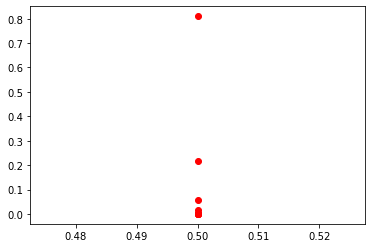

In [99]:
import matplotlib.pyplot as plt

x0 = np.array([1,3], dtype=np.float) # random
A1 = np.array([[0,0],
             [0, 0.27]], dtype=np.float)
d1 = np.array([0.5, 0], dtype=np.float)

plt.figure()
for k in range(10):
    x1 = np.dot(A1, x0) + d1
    plt.plot(x1[0], x1[1], 'ro')
    x0 = x1


In [107]:
# set the params

A_all = np.array([[[0,0],
               [0,0.27]],
              [[-0.139, 0.263],
              [0.246, 0.224]],
              [[0.17, -0.215],
              [0.222, 0.176]],
              [[0.781, 0.034],
              [-0.032, 0.739]]])


d_all = np.array([[[0.5],
             [0]],
             [[0.57],
             [-0.036]],
             [[0.408],
             [0.0893]],
             [[0.1075],
             [0.27]]])

print(A.shape, d.shape)

(4, 2, 2) (4, 2, 1)


In [141]:

plt.figure()
x0 = np.random.rand(2)
print(x0.shape)
for i in range(100):
    print(i)
    sk = np.random.choice(4, 1, p=[0.02, 0.15, 0.13, 0.7])
    
    A = A_all[sk].reshape(2,2)
    d = d_all[sk].reshape(2,1)
    x1 = np.dot(A, x0) + d
    print(np.dot(A, x0).shape)
    print(x1.shape)
    x0 = x1

(2,)
0
(2,)
(2, 2)
1
(2, 2)
(2, 2)
2
(2, 2)
(2, 2)
3
(2, 2)
(2, 2)
4
(2, 2)
(2, 2)
5
(2, 2)
(2, 2)
6
(2, 2)
(2, 2)
7
(2, 2)
(2, 2)
8
(2, 2)
(2, 2)
9
(2, 2)
(2, 2)
10
(2, 2)
(2, 2)
11
(2, 2)
(2, 2)
12
(2, 2)
(2, 2)
13
(2, 2)
(2, 2)
14
(2, 2)
(2, 2)
15
(2, 2)
(2, 2)
16
(2, 2)
(2, 2)
17
(2, 2)
(2, 2)
18
(2, 2)
(2, 2)
19
(2, 2)
(2, 2)
20
(2, 2)
(2, 2)
21
(2, 2)
(2, 2)
22
(2, 2)
(2, 2)
23
(2, 2)
(2, 2)
24
(2, 2)
(2, 2)
25
(2, 2)
(2, 2)
26
(2, 2)
(2, 2)
27
(2, 2)
(2, 2)
28
(2, 2)
(2, 2)
29
(2, 2)
(2, 2)
30
(2, 2)
(2, 2)
31
(2, 2)
(2, 2)
32
(2, 2)
(2, 2)
33
(2, 2)
(2, 2)
34
(2, 2)
(2, 2)
35
(2, 2)
(2, 2)
36
(2, 2)
(2, 2)
37
(2, 2)
(2, 2)
38
(2, 2)
(2, 2)
39
(2, 2)
(2, 2)
40
(2, 2)
(2, 2)
41
(2, 2)
(2, 2)
42
(2, 2)
(2, 2)
43
(2, 2)
(2, 2)
44
(2, 2)
(2, 2)
45
(2, 2)
(2, 2)
46
(2, 2)
(2, 2)
47
(2, 2)
(2, 2)
48
(2, 2)
(2, 2)
49
(2, 2)
(2, 2)
50
(2, 2)
(2, 2)
51
(2, 2)
(2, 2)
52
(2, 2)
(2, 2)
53
(2, 2)
(2, 2)
54
(2, 2)
(2, 2)
55
(2, 2)
(2, 2)
56
(2, 2)
(2, 2)
57
(2, 2)
(2, 2)
58
(2, 2)
(2, 2)
59
(

<Figure size 432x288 with 0 Axes>

In [123]:
print(x1.shape)
x1

(1, 2, 2)


array([[[0.37717859, 0.70654745],
        [0.27782263, 0.56354507]]])

In [150]:
x0 = np.random.rand(2)
x0.shape
print(A)
print(x0)
print(np.dot(A, x0).shape)
print(np.dot(A, x0))

print(np.dot(A, x0) + d)

[[ 0.17  -0.215]
 [ 0.222  0.176]]
[0.2729186 0.9986577]


array([[ 0.23968476,  0.64435168],
       [-0.07901524,  0.32565168]])